# Fake vs True News Classification Project:

###-Why we should alert from Fake news ?
The spread of fake news has become easier in the digital age, as social media platforms and other online channels allow anyone to create and share content with the world. The problem with fake news is that it can be very convincing, and people may believe it to be true without questioning its authenticity. This can lead to a range of negative consequences, That is why a sophisticated method is required to identify fake news

###-What is the objective of news classification using NLP?

The major objective is to develop a accurate model that uses DL algorithms and NLP techniques to classify a given news article as false or genuine, allowing only authentic news to be presented to the public.

###-Goal
It is to create an algorithm using Machine Learning & NLP  to classify short news in labels automatically, that is the algorithm receives a news and informs which label (category) that news is from.


# Step-1:- Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Step-2 : Loading and Cleaning Data

In [ ]:
# 2.1 Import Data
df = pd.read_csv('news.csv',error_bad_lines=False,engine='python')
df

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,true


In [ ]:
# 2.2 Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   label   44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB




*   After Inspecting we can see there are 44898 rows and 3 columns



In [ ]:
# The df.isna()/isnull() code gives the counts of missing values
df.isna().sum()

title    0
text     0
label    0
dtype: int64



*   We can see there is no null values in the dataset



In [ ]:
df['label'].value_counts(normalize=True)

fake    0.522985
true    0.477015
Name: label, dtype: float64



**The Percentage of True and Fake News articles:**

- True:- 48%
- Fake:- 52%


In [ ]:
df['label'].replace({'true':1,'fake':0},inplace=True)
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


Text(0.5, 1.0, 'Distribution of Fake/True News')

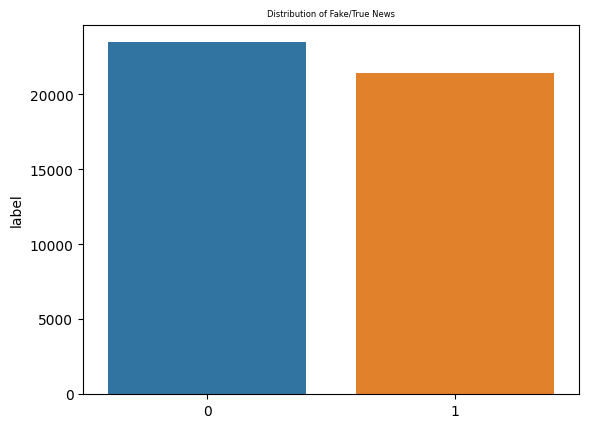

In [ ]:
class_names = ['fake','true']
l_count = df['label'].value_counts()
sns.barplot(x=l_count.index, y=l_count)
plt.title('Distribution of Fake/True News',fontsize =6)

-  Data Visualization of all News Titles

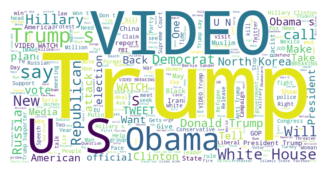

In [ ]:
from wordcloud import WordCloud
titles = ' '.join(title for title in df['title'])
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(titles)

plt.figure(figsize=(5,2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Many of available news articles are about elections and presidents of USA**

In [ ]:
def clean_text(msg):
  token = word_tokenize(msg.lower())
  ftoken = [i for i in token if i.isalpha()]

  stop = stopwords.words('english')
  stoken = [i for i in ftoken if i not in stop]

  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(i) for i in stoken]

  return ' '.join(ltoken)

In [ ]:
#Converting data type of 'title' column into string type
df['title']=df['title'].astype(str)

In [ ]:
df['clean_msg'] = df['title'].apply(clean_text)

In [ ]:
df.head()

,title,text,label,clean_msg
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech


#Step 3:-Data Preprocessing

In [ ]:
#spliting data into x and y
x = df['clean_msg']
y = df['label']

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
44893    1
44894    1
44895    1
44896    1
44897    1
Name: label, Length: 44898, dtype: int64

In [ ]:
# Spliting the dataset into 70% and 30% for train and test respectively
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(min_df=0.02)
xtrain = cvec.fit_transform(xtrain).toarray()
xtest = cvec.transform(xtest).toarray()

In [ ]:
x

0        donald trump sends embarrassing new year eve m...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obama name coded website i...
4        pope francis called donald trump christmas speech
                               ...                        
44893         committed nato back new approach afghanistan
44894       lexisnexis withdrew two product chinese market
44895                 minsk cultural hub becomes authority
44896    vatican upbeat possibility pope francis visiti...
44897              indonesia buy billion worth russian jet
Name: clean_msg, Length: 44898, dtype: object

In [ ]:
df.head()

,title,text,label,clean_msg
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech


In [ ]:
empty = []
for indx,tl,txt,lbl,cm in df.itertuples():
  if type(cm)==str:
    if cm.isspace():
      empty.append(indx)
print(empty)

[]


In [ ]:
xtrain

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
xtest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Model 1:- ANN

In [ ]:
# Building the 'Artificial Neural Network(ANN)'
ann = Sequential()
ann.add(Dense(units=32,activation='relu'))
ann.add(Dropout(rate=0.20))
ann.add(Dense(units=24,activation='relu'))
ann.add(Dropout(rate=0.20))
ann.add(Dense(units=12,activation='relu'))
ann.add(Dropout(rate=0.20))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain,batch_size=50,epochs=50,validation_split=0.20)

Epoch 1/50
503/503 [==============================] - 3s 3ms/step - loss: 0.5237 - val_loss: 0.4400
Epoch 2/50
503/503 [==============================] - 1s 3ms/step - loss: 0.4558 - val_loss: 0.4367
Epoch 3/50
503/503 [==============================] - 1s 3ms/step - loss: 0.4503 - val_loss: 0.4347
Epoch 4/50
503/503 [==============================] - 2s 3ms/step - loss: 0.4477 - val_loss: 0.4334
Epoch 5/50
503/503 [==============================] - 1s 3ms/step - loss: 0.4453 - val_loss: 0.4337
Epoch 6/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4428 - val_loss: 0.4333
Epoch 7/50
503/503 [==============================] - 1s 3ms/step - loss: 0.4432 - val_loss: 0.4333
Epoch 8/50
503/503 [==============================] - 1s 2ms/step - loss: 0.4416 - val_loss: 0.4321
Epoch 9/50
503/503 [==============================] - 1s 3ms/step - loss: 0.4400 - val_loss: 0.4328
Epoch 10/50
503/503 [==============================] - 1s 3ms/step - loss: 0.4396 - val_loss: 0.4335

#Evaluation

Let's evaluate the performance of the ANN on the test set and generate a classification report.

In [ ]:
ypred = ann.predict(xtest)
ypred = ypred>0.5

421/421 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.62      0.74      7053
           1       0.69      0.95      0.80      6417

    accuracy                           0.77     13470
   macro avg       0.81      0.78      0.77     13470
weighted avg       0.82      0.77      0.77     13470



In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#Model 2:- LogisticRegression

#Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

Let's evaluate the performance of the LogisticRegression on the test set and generate a classification report.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      7053
           1       0.69      0.95      0.80      6417

    accuracy                           0.77     13470
   macro avg       0.81      0.78      0.77     13470
weighted avg       0.82      0.77      0.77     13470



In [ ]:
df.head()

,title,text,label,clean_msg
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech


In [ ]:
#spliting data into x and y
x = df['clean_msg']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
sentlen = []
for i in df['clean_msg']:
  sentlen.append(len(word_tokenize(i)))

df['Sentlen'] = sentlen

In [ ]:
df.head()

,title,text,label,clean_msg,Sentlen
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump sends embarrassing new year eve m...,9
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,drunk bragging trump staffer started russian c...,8
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,sheriff david clarke becomes internet joke thr...,10
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,trump obsessed even obama name coded website i...,8
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis called donald trump christmas speech,7


In [ ]:
max(sentlen)

26

In [ ]:
min(sentlen)

1

In [ ]:
np.quantile(sentlen,0.90)

12.0

In [ ]:
max_len = np.quantile(sentlen,0.90)

In [ ]:
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'trump',
 2: 'video',
 3: 'say',
 4: 'obama',
 5: 'hillary',
 6: 'house',
 7: 'watch',
 8: 'republican',
 9: 'new',
 10: 'clinton',
 11: 'white',
 12: 'president',
 13: 'state',
 14: 'bill',
 15: 'russia',
 16: 'democrat',
 17: 'call',
 18: 'get',
 19: 'north',
 20: 'election',
 21: 'vote',
 22: 'court',
 23: 'news',
 24: 'black',
 25: 'korea',
 26: 'tweet',
 27: 'attack',
 28: 'breaking',
 29: 'muslim',
 30: 'make',
 31: 'donald',
 32: 'senate',
 33: 'medium',
 34: 'tax',
 35: 'china',
 36: 'woman',
 37: 'gop',
 38: 'plan',
 39: 'leader',
 40: 'american',
 41: 'want',
 42: 'police',
 43: 'campaign',
 44: 'show',
 45: 'deal',
 46: 'senator',
 47: 'back',
 48: 'may',
 49: 'go',
 50: 'official',
 51: 'iran',
 52: 'russian',
 53: 'one',
 54: 'america',
 55: 'supporter',
 56: 'party',
 57: 'law',
 58: 'tell',
 59: 'right',
 60: 'talk',
 61: 'u',
 62: 'take',
 63: 'people',
 64: 'government',
 65: 'eu',
 66: 'cnn',
 67: 'fbi',
 68: 'former',
 69: 'syria',
 70: 'war',
 71: 'million',
 72

In [ ]:
vocab_len = len(tok.index_word)
vocab_len

15485

In [ ]:
seqtrain = tok.texts_to_sequences(xtrain)
seqmattrain = sequence.pad_sequences(seqtrain,maxlen=int(max_len))
seqmattrain

array([[   0,    0,    0, ...,  320, 4905,  227],
       [   0,    0,    0, ..., 6005,   17,  291],
       [   0,    0,    0, ..., 1297, 6006,  533],
       ...,
       [   0,    0,    0, ...,   54,  738,  959],
       [   0,   87, 1007, ...,  373,   12, 2069],
       [   0,    0,    0, ...,  354,  503,   14]], dtype=int32)

In [ ]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest,maxlen=int(max_len))
seqmattest

array([[   0,    0,    0, ...,  691,  482,   13],
       [   0,    0,    0, ...,   47,    5,   10],
       [   0,    0,    0, ..., 1379, 7440,    2],
       ...,
       [   0, 8050,   65, ..., 1898,   20, 2063],
       [  37,  978, 6557, ...,  348, 6720,  159],
       [   0,    0,    0, ...,  672,    3,  323]], dtype=int32)

#Model 3:- SimpleRNN

In [ ]:
# Building The 'SimpleRNN'
rnn = Sequential()
rnn.add(Embedding(vocab_len+1,300,input_length=int(max_len),mask_zero=True))
rnn.add(SimpleRNN(units=30,activation='tanh'))
rnn.add(Dense(units=30,activation='relu'))
rnn.add(Dropout(rate=0.30))
rnn.add(Dense(units=1,activation='sigmoid'))
rnn.compile(optimizer='adam',loss='binary_crossentropy')
rnn.fit(seqmattrain,ytrain,batch_size=50,epochs=25)

Epoch 1/25
629/629 [==============================] - 60s 92ms/step - loss: 0.1945
Epoch 2/25
629/629 [==============================] - 45s 71ms/step - loss: 0.0489
Epoch 3/25
629/629 [==============================] - 44s 71ms/step - loss: 0.0189
Epoch 4/25
629/629 [==============================] - 47s 74ms/step - loss: 0.0099
Epoch 5/25
629/629 [==============================] - 44s 70ms/step - loss: 0.0064
Epoch 6/25
629/629 [==============================] - 45s 72ms/step - loss: 0.0045
Epoch 7/25
629/629 [==============================] - 45s 71ms/step - loss: 0.0044
Epoch 8/25
629/629 [==============================] - 46s 72ms/step - loss: 0.0078
Epoch 9/25
629/629 [==============================] - 44s 71ms/step - loss: 0.0037
Epoch 10/25
629/629 [==============================] - 46s 73ms/step - loss: 0.0030
Epoch 11/25
629/629 [==============================] - 44s 70ms/step - loss: 0.0024
Epoch 12/25
629/629 [==============================] - 45s 71ms/step - loss: 0.0044
E

#Evaluation

Let's evaluate the performance of the SimpleRNN on the test set and generate a classification report.

In [ ]:
ypred = rnn.predict(seqmattest)
ypred = ypred>0.5

421/421 [==============================] - 2s 4ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7053
           1       0.93      0.94      0.94      6417

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



#Model 4:- LSTM

In [ ]:
# Building The 'LSTM'
rnn = Sequential()
rnn.add(Embedding(vocab_len+1,300,input_length=int(max_len),mask_zero=True))
rnn.add(LSTM(units=30,activation='tanh'))
rnn.add(Dense(units=30,activation='relu'))
rnn.add(Dropout(rate=0.30))
rnn.add(Dense(units=1,activation='sigmoid'))
rnn.compile(optimizer='adam',loss='binary_crossentropy')
rnn.fit(seqmattrain,ytrain,batch_size=50,epochs=25)

Epoch 1/25
629/629 [==============================] - 54s 79ms/step - loss: 0.1862
Epoch 2/25
629/629 [==============================] - 53s 84ms/step - loss: 0.0613
Epoch 3/25
629/629 [==============================] - 48s 77ms/step - loss: 0.0321
Epoch 4/25
629/629 [==============================] - 48s 77ms/step - loss: 0.0187
Epoch 5/25
629/629 [==============================] - 48s 76ms/step - loss: 0.0096
Epoch 6/25
629/629 [==============================] - 49s 77ms/step - loss: 0.0097
Epoch 7/25
629/629 [==============================] - 49s 78ms/step - loss: 0.0076
Epoch 8/25
629/629 [==============================] - 49s 78ms/step - loss: 0.0035
Epoch 9/25
629/629 [==============================] - 49s 77ms/step - loss: 0.0040
Epoch 10/25
629/629 [==============================] - 52s 82ms/step - loss: 0.0029
Epoch 11/25
629/629 [==============================] - 48s 77ms/step - loss: 0.0018
Epoch 12/25
629/629 [==============================] - 49s 78ms/step - loss: 0.0028
E

#Evaluation

Let's evaluate the performance of the LSTM on the test set and generate a classification report.

In [ ]:
ypred = rnn.predict(seqmattest)
ypred = ypred>0.5

421/421 [==============================] - 3s 5ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7053
           1       0.95      0.95      0.95      6417

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



## RESULT :
In this project, we are predicting whether the news is a real or fake based on the relationship between the
words . We have used the fake and true news datasets for creation of this system. We used to perform Text Preprocessing(Tokenization, Stemming/Lemmatization, Stop word removal), Vectorization to detect the news is
fake or true ,at the last we can obtained an accuracy of 98.09% ,hence we can declared this news is true.
## FUTURE SCOPE :
In the future, a possible improvement would be to employ several meta-data about the source and the author of
news, along with social media information diffusion features and use Deep Learning methods with larger
datasets. In that way, the fake news detection task would not only be content-based and would improve the
prevention of their dissemination in social networks. The proposed features combined with ML algorithms
obtained accuracy up to 95% over all datasets.
## CONCLUSION :
Fake news are responsible for creating false, deceptive, misleading and suspicious information that can greatly
effect the outcome of an event. This project explains what are fake and true news and we use natural language
processing(NLP), for automatically predicting and detecting fake news and true news

Finally after doing Data cleaning and Data Preprocessing (cleaning data, train_test_split model, creating a bag of words NLP model, and machine learning model) we got the accuracy scores and we can say that LSTM Model Classification gives the best accuracy among NLP models.

And at last, we also predict the category of different news
- Accuracy achieved using ANN Model : 77%
- Accuracy achieved using LogisticRegression Model : 77%
- Accuracy achieved using SimpleRNN Model : 94%
- Accuracy achieved using LSTM Model : 95%
